In [32]:
import os
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


In [33]:
Dataset="/content/drive/MyDrive/exampledata"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['without_mask', 'with_mask']


In [34]:
images=[]

img_rows=112
img_cols=112
for category in Data_Dir:
    folder_path=os.path.join(Dataset,category)
    for img in os.listdir(folder_path):
        img_path=os.path.join(folder_path,img)
        img=cv2.imread(img_path)
        grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
            
            
        images.append(resized_img)
       


In [35]:
images[0]

array([[ 42,  42,  44, ..., 123, 101,  87],
       [ 42,  42,  44, ...,  98,  78,  67],
       [ 42,  42,  44, ...,  82,  71,  70],
       ...,
       [ 22,  20,  18, ..., 171, 108, 101],
       [ 23,  22,  19, ..., 179,  99,  96],
       [ 26,  24,  21, ..., 114,  98, 102]], dtype=uint8)

In [36]:
images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows,img_cols,1))

In [37]:
images[0]

array([[[0.16470588],
        [0.16470588],
        [0.17254902],
        ...,
        [0.48235294],
        [0.39607843],
        [0.34117647]],

       [[0.16470588],
        [0.16470588],
        [0.17254902],
        ...,
        [0.38431373],
        [0.30588235],
        [0.2627451 ]],

       [[0.16470588],
        [0.16470588],
        [0.17254902],
        ...,
        [0.32156863],
        [0.27843137],
        [0.2745098 ]],

       ...,

       [[0.08627451],
        [0.07843137],
        [0.07058824],
        ...,
        [0.67058824],
        [0.42352941],
        [0.39607843]],

       [[0.09019608],
        [0.08627451],
        [0.0745098 ],
        ...,
        [0.70196078],
        [0.38823529],
        [0.37647059]],

       [[0.10196078],
        [0.09411765],
        [0.08235294],
        ...,
        [0.44705882],
        [0.38431373],
        [0.4       ]]])

In [38]:
label1=[1]*1958
label0=[0]*1580
labelreal=label1+label0

In [39]:
labelreal[-1]

0

In [40]:
print(len(images))

3538


In [41]:

labels=np.array(labelreal)
(X_tr,X_te,y_tr,y_te)=train_test_split(images,labels,test_size=0.5,random_state=0)

y_te2 = y_te

In [42]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [43]:
labels[0:1958]

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
labels[1958:0]

array([], dtype=int64)

In [45]:
X_tr.shape

(1769, 112, 112, 1)

In [46]:
X_tr_=X_tr.reshape(-1,12544)
X_tr_2 = X_tr_

In [47]:
X_tr_.shape

(1769, 12544)

In [48]:
X_te.shape

(1769, 112, 112, 1)

In [49]:
X_te_=X_te.reshape(-1,12544)
X_te_2 = X_te_

In [50]:
X_te_.shape

(1769, 12544)

In [51]:
y_tr

array([0, 0, 1, ..., 1, 0, 0])

In [52]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
clf = svm.SVC(gamma=0.001)

clf.fit(X_tr_, y_tr)
predicted = clf.predict(X_te_)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_tr, predicted)

0.5138496325607688

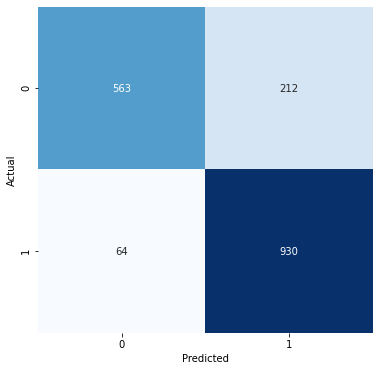

In [54]:
from sklearn import svm, datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_te,predicted)
plt.figure(figsize=(6,6))
sns.heatmap(cm, cbar=False, fmt='d', annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
acc1 = accuracy_score(y_tr, predicted)

In [56]:
from sklearn.multiclass import OneVsRestClassifier
#x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
ovr = OneVsRestClassifier(clf)
ovr.fit(X_te_, y_te)
print(ovr.score(X_tr_,y_tr))
predicted = ovr.predict(X_te_)

0.8535895986433013


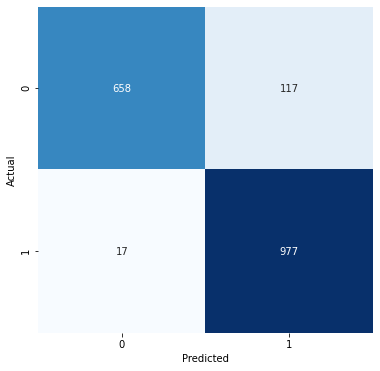

In [57]:
cm = confusion_matrix(y_te,predicted)
plt.figure(figsize=(6,6))
sns.heatmap(cm, cbar=False, fmt='d', annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Lda followed by svm

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_tr_ = lda.fit_transform(X_tr_, y_tr)
X_te_ = lda.transform(X_te_)

In [59]:
clf.fit(X_tr_, y_tr)
y_pred = clf.predict(X_te_)
accuracy_score(y_te, y_pred)

0.6365178066704352

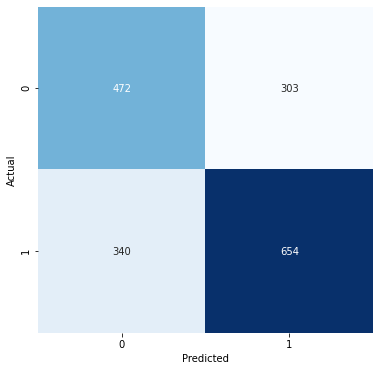

In [61]:
cm = confusion_matrix(y_te,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, cbar=False,fmt='d', annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
acc2 = accuracy_score(y_te, y_pred)

k neighbours


In [62]:
#(X_val,X_te,y_val,y_te)=train_test_split(images,labels,test_size=0.1,random_state=0)
(X_val, X_tr, y_val, y_tr) = train_test_split(X_tr, y_tr, test_size=0.9)

In [63]:
X_val_=X_val.reshape(-1,12544)
X_te_=X_te.reshape(-1,12544)
X_tr_=X_tr.reshape(-1,12544)

In [64]:
X_val_.shape

(176, 12544)

In [65]:
X_te_.shape

(1769, 12544)

In [66]:
X_tr_.shape

(1593, 12544)

In [67]:
y_val

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [68]:
X_te_.shape

(1769, 12544)

In [69]:
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from skimage import exposure
import cv2


kVals = [1,2,4,6]
accuracies = []
for k in kVals:
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(X_val_, y_val)
	score = model.score(X_val_,y_val)
	print(k, score * 100)
	accuracies.append(score)
 
i = int(np.argmax(accuracies))
print(kVals[i],
	accuracies[i] * 100)

1 100.0
2 83.52272727272727
4 81.25
6 77.27272727272727
1 100.0


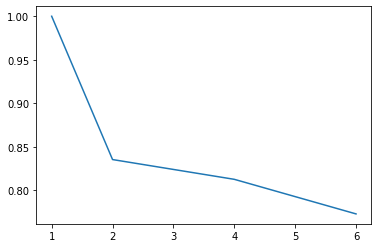

In [72]:
plt.plot(kVals, accuracies)
plt.show()

In [71]:
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(X_tr_, y_tr)
predictions = model.predict(X_te_)
accuracy_score(y_te2, predictions)

0.7659694742792538

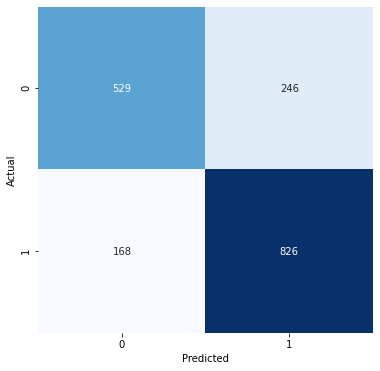

In [73]:
cm = confusion_matrix(y_te,predictions)
plt.figure(figsize=(6,6))
sns.heatmap(cm, cbar=False, fmt='d', annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
acc3 = accuracy_score(y_te, predictions)